In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# read the Houses dataset CSV file
housing_data = pd.read_csv("./RealEstate.csv", sep=",")
print(housing_data[0:5])

      MLS            Location     Price  Bedrooms  Bathrooms  Size  \
0  132842       Arroyo Grande  795000.0         3          3  2371   
1  134364         Paso Robles  399000.0         4          3  2818   
2  135141         Paso Robles  545000.0         4          3  3032   
3  135712           Morro Bay  909000.0         4          4  3540   
4  136282  Santa Maria-Orcutt  109900.0         3          1  1249   

   Price/SQ.Ft      Status  
0       335.30  Short Sale  
1       141.59  Short Sale  
2       179.75  Short Sale  
3       256.78  Short Sale  
4        87.99  Short Sale  


In [3]:
# only get the Size and the Price features
Xs = housing_data[['Size']]
Ys = housing_data[['Price']]
print("Size shape:", Xs.shape)
print("Price shape:", Ys.shape)
dataset_size = Xs.shape[0]
print("Size:", dataset_size)

Size shape: (781, 1)
Price shape: (781, 1)
Size: 781


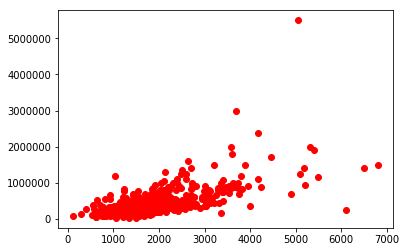

In [4]:
# plot the price and the size
plt.plot(Xs, Ys, 'ro')

In [5]:
Xs = Xs.values.squeeze()
Ys = Ys.values.squeeze()

In [6]:
# Xs = [0.0, 0.22, 0.24, 0.33, 0.37, 0.44, 0.44, 0.57, 0.93, 1.0]
# Ys = [0.0, 0.22, 0.58, 0.20, 0.55, 0.39, 0.54, 0.53, 1.00, 0.6]

In [7]:
# Normalize the input features
max_size = np.max(Xs)
min_size = np.min(Xs)
max_price = np.max(Ys)
min_price = np.min(Ys)

In [8]:
Xs = (Xs - min_size) / (max_size - min_size)
Ys = (Ys - min_price) / (max_price - min_price)

In [9]:
train_size = int(0.8 * dataset_size)
Xs_train = Xs[0:train_size]
Xs_test = Xs[train_size:]
Ys_train = Ys[0:train_size]
Ys_test = Ys[train_size:]

Text(0,0.5,'Price')

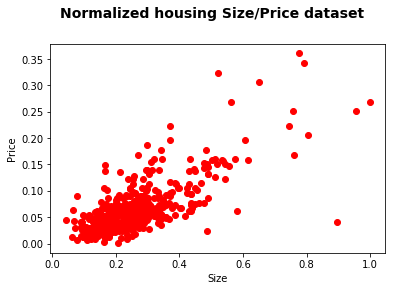

In [27]:
# plot the price and the size
fig = plt.figure()
fig.suptitle('Normalized housing Size/Price dataset', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.plot(Xs_train, Ys_train, 'ro')
ax.set_xlabel('Size')
ax.set_ylabel('Price')

In [11]:
min_x = np.min(Xs_train)
max_x = np.max(Xs_train)

In [12]:
# Define the Linear model
# Initialize the weights using a normal (Gaussian) distribution with 0 mean and unit variance
W0 = np.random.normal(loc=0, scale=0.02) # Y intercept
W1 = np.random.normal(loc=0, scale=0.02) # Slop of the line
print(W0, W1)

0.013759561413662611 0.009554778093257627


In [13]:
def next_batch(Xs, Ys, batch_size=64):
    p = np.random.permutation(len(Xs))
    Xs = Xs[p]
    Ys = Ys[p]
    for i in range(0,Xs.shape[0],batch_size):
        yield Xs[i:i+batch_size], Ys[i:i+batch_size]

In [14]:
def eval_and_plot(W0, W1, min_x, max_x, id_):
    min_y = W0 + np.dot(W1, min_x)
    max_y = W0 + np.dot(W1, max_x)
    plt.plot(Xs_train, Ys_train, 'ro')
    plt.plot([min_x, max_x], [min_y, max_y], 'k-', lw=2)
    plt.savefig("./media/fit%(number)04d.png" % {"number": id_})
    plt.clf()

In [15]:
# defines the size of the step we want to perform in the direction of the gradient
lr = 0.001

# set the pocket weights
W0_hat = np.inf
W1_hat = np.inf
best_hypothesis = np.inf

err_test_list = []
last_best_err = np.inf

In [16]:
for epoch in range(500):
    for Xs_batch, Ys_batch in next_batch(Xs, Ys, batch_size=128):

        # linearly combine input and weights
        Y_pred = W0 + np.dot(W1, Xs_batch)

        # calculate the SSE between predicted and true values
        err = 1/2 * sum((Ys_batch-Y_pred)**2)

        # calculate the gradients with respect to W0 and W1
        DW0 = - (Y_pred-Ys_batch)
        DW1 = - (Xs_batch * (Y_pred - Ys_batch))

        # update W0 and W1 in the opposite direction to the gradient
        W0 = W0 + lr * sum(DW0)
        W1 = W1 + lr * sum(DW1)
    
    eval_and_plot(W0, W1, min_x, max_x, epoch+1)
    
    # test in the end of epoch
    Y_pred = W0 + np.dot(W1, Xs_test)
    err = 1/2 * sum((Ys_test-Y_pred)**2)
    print("Epoch:", epoch, "Generalization err:", err)
    err_test_list.append(err)
    
    last_best_err = err
    epoch += 1
    if err < best_hypothesis:
        best_hypothesis = err
        W0_hat = W0
        W1_hat = W1

Epoch: 0 Generalization err: 1.012181151949915
Epoch: 1 Generalization err: 0.9300471070025581
Epoch: 2 Generalization err: 0.9015794930385056
Epoch: 3 Generalization err: 0.8859984129065386
Epoch: 4 Generalization err: 0.8777257505290842
Epoch: 5 Generalization err: 0.8708826097598225
Epoch: 6 Generalization err: 0.8683679853247707
Epoch: 7 Generalization err: 0.8640624919125793
Epoch: 8 Generalization err: 0.8588081623377531
Epoch: 9 Generalization err: 0.8538331340489954
Epoch: 10 Generalization err: 0.8485442873463406
Epoch: 11 Generalization err: 0.8462106343716147
Epoch: 12 Generalization err: 0.842215585946844
Epoch: 13 Generalization err: 0.8375637833832467
Epoch: 14 Generalization err: 0.831853052477911
Epoch: 15 Generalization err: 0.8314844268641975
Epoch: 16 Generalization err: 0.8259209534812503
Epoch: 17 Generalization err: 0.8219145855615336
Epoch: 18 Generalization err: 0.8182296697084637
Epoch: 19 Generalization err: 0.8164050688813682
Epoch: 20 Generalization err: 0.8

Epoch: 168 Generalization err: 0.6131367149172988
Epoch: 169 Generalization err: 0.6121581118445522
Epoch: 170 Generalization err: 0.6106645026436595
Epoch: 171 Generalization err: 0.6102259291554404
Epoch: 172 Generalization err: 0.6106858915121118
Epoch: 173 Generalization err: 0.6111880632189602
Epoch: 174 Generalization err: 0.6104805643237532
Epoch: 175 Generalization err: 0.6113259654308145
Epoch: 176 Generalization err: 0.611175833059026
Epoch: 177 Generalization err: 0.6098771061788576
Epoch: 178 Generalization err: 0.609437254798988
Epoch: 179 Generalization err: 0.6112741016295982
Epoch: 180 Generalization err: 0.610262810910087
Epoch: 181 Generalization err: 0.6089278051660754
Epoch: 182 Generalization err: 0.608259277179754
Epoch: 183 Generalization err: 0.607037364212738
Epoch: 184 Generalization err: 0.6080499718407784
Epoch: 185 Generalization err: 0.6064538924961292
Epoch: 186 Generalization err: 0.6054757083474327
Epoch: 187 Generalization err: 0.606787481854766
Epoch:

Epoch: 335 Generalization err: 0.582846071965236
Epoch: 336 Generalization err: 0.5829959686543765
Epoch: 337 Generalization err: 0.5820821536224938
Epoch: 338 Generalization err: 0.5819927773197675
Epoch: 339 Generalization err: 0.5832725952197599
Epoch: 340 Generalization err: 0.5835526937258285
Epoch: 341 Generalization err: 0.5848037408358618
Epoch: 342 Generalization err: 0.5852946761764369
Epoch: 343 Generalization err: 0.585555656050754
Epoch: 344 Generalization err: 0.5850412077140864
Epoch: 345 Generalization err: 0.5853594784864665
Epoch: 346 Generalization err: 0.5831348644334887
Epoch: 347 Generalization err: 0.5832106593193694
Epoch: 348 Generalization err: 0.5825352704666653
Epoch: 349 Generalization err: 0.5802621002434326
Epoch: 350 Generalization err: 0.5817617645951051
Epoch: 351 Generalization err: 0.5832035163406385
Epoch: 352 Generalization err: 0.5817769020525577
Epoch: 353 Generalization err: 0.5813349325709032
Epoch: 354 Generalization err: 0.5838307910241451
Ep

In [17]:
#os.system("some_command < input_file | another_command > output_file")  

In [18]:
# remove all images in the end
#os.remove("./media/fit*.csv")

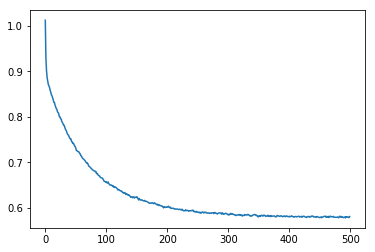

In [19]:
plt.plot(err_test_list)